In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from path import Path

In [5]:
fb = pd.read_csv(Path("../Practicing_Python_daily/data/facebook.csv"))
ms = pd.read_csv(Path("../Practicing_Python_daily/data/microsoft.csv"))

In [15]:
fb = fb.set_index("Date")
ms = ms.set_index("Date")

## Create a new column in the DataFrame (1) - Price difference

In [16]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

fb

,Open,High,Low,Close,Adj Close,Volume,PriceDiff
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002
...,...,...,...,...,...,...,...
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,3.080002
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,-5.300003
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,-6.979996


In [17]:
#Create a new column PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

ms


,Open,High,Low,Close,Adj Close,Volume,PriceDiff
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000
...,...,...,...,...,...,...,...
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,2.270004
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-0.750000
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,-2.480003


In [18]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6799999999999997


** Expected Output: ** -0.68

## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [20]:
#Create a new column Return in the DataFrame fb

fb['Return'] = fb['PriceDiff'] /fb['Close']

In [21]:
#Create a new column Return in the DataFrame ms

ms['Return'] = ms['PriceDiff'] /ms['Close']

In [22]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


** Expected Output: ** -0.0146773142811

## Create a new column in the DataFrame using List Comprehension - Direction

In [23]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [24]:
# Create a new column Direction for MS

ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index ]

In [25]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

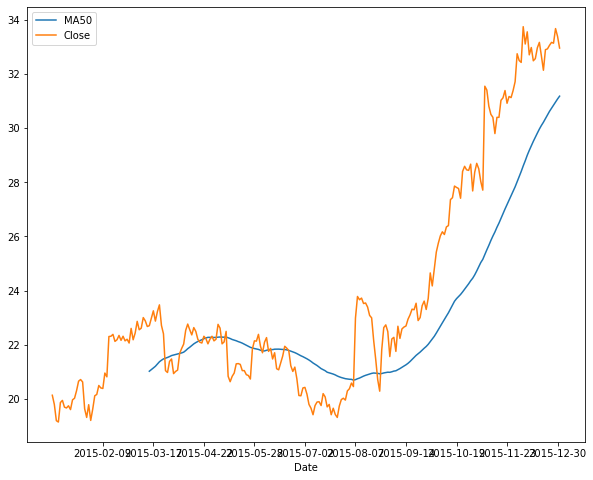

In [26]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

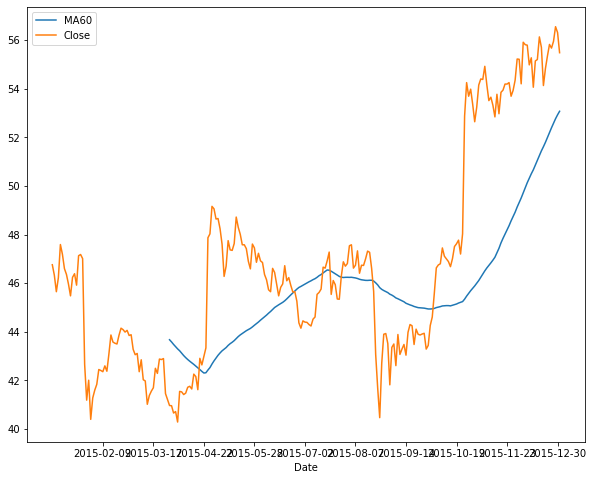

In [28]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()